# Analysis of Datasets 3, 4 and 8

The aim of this Data Analysis is to investigate the patterns between the average number of steps on weekends and weekdays.

In [132]:
import pandas as pd
from scipy.stats import ttest_ind
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

#Imports the Data from path in github repo
dataset3 = pd.read_csv("../../../datasets/Participant-03.csv")
dataset4 = pd.read_csv("../../../datasets/Participant-04.csv")
dataset8 = pd.read_csv("../../../datasets/Participant-08.csv")


In [133]:
#rename Columns names to uniform standard
dataset3.rename(columns = {"Steps (count)": "Steps"}, inplace = True)
dataset4.rename(columns = {"Steps (count)": "Steps"}, inplace = True)
dataset8.rename(columns = {"Steps (count)": "Steps"}, inplace = True)

#Transform String into DataTime format for Start and Finish Columns
dataset3['Start'] = pd.to_datetime( dataset3['Start'], infer_datetime_format = True)
dataset3['Finish'] = pd.to_datetime( dataset3['Finish'], infer_datetime_format = True)

dataset4['Start'] = pd.to_datetime( dataset4['Start'], infer_datetime_format = True)
dataset4['Finish'] = pd.to_datetime( dataset4['Finish'], infer_datetime_format = True)

dataset8['Start'] = pd.to_datetime( dataset8['Start'], infer_datetime_format = True)
dataset8['Finish'] = pd.to_datetime( dataset8['Finish'], infer_datetime_format = True)

#Create a new column with the starting day of each sample 1 hours period
dataset3['Day'] = dataset3['Start'].dt.day_of_week
dataset4['Day'] = dataset4['Start'].dt.day_of_week
dataset8['Day'] = dataset8['Start'].dt.day_of_week

#Creates an hour column, ranging from 0 to 23
dataset3['Hour'] = dataset3['Start'].dt.hour
dataset4['Hour'] = dataset4['Start'].dt.hour
dataset8['Hour'] = dataset8['Start'].dt.hour

#Separate both datasets into weekend and weekday subsets
weekdays3 = dataset3[(dataset3['Day'] != 5) & (dataset3['Day'] != 6)]
weekends3 = dataset3[(dataset3['Day'] == 5) | (dataset3['Day'] == 6)]

weekdays4 = dataset4[(dataset4['Day'] != 5) & (dataset4['Day'] != 6)]
weekends4 = dataset4[(dataset4['Day'] == 5) | (dataset4['Day'] == 6)]

weekdays8 = dataset8[(dataset8['Day'] != 5) & (dataset8['Day'] != 6)]
weekends8 = dataset8[(dataset8['Day'] == 5) | (dataset8['Day'] == 6)]

In [134]:
#perform t-test on participant-3 dataset between the weekend and weekday means 
ttest_ind(weekdays3['Steps'], weekends3['Steps'], equal_var=False)


Ttest_indResult(statistic=7.320917977190458, pvalue=3.0127326922931654e-13)

In [135]:
#perform t-test on participant-4 dataset between the weekend and weekday means 
ttest_ind(weekdays4['Steps'], weekends4['Steps'], equal_var=False)


Ttest_indResult(statistic=-5.936769895798475, pvalue=3.372907740209798e-09)

In [136]:
#perform t-test on participant-8 dataset between the weekend and weekday means 
ttest_ind(weekdays8['Steps'], weekends8['Steps'], equal_var=False)

Ttest_indResult(statistic=-1.0765975910542522, pvalue=0.2817412306650023)

## Do Weekends and Weekdays have different average numbers of steps?
To test this hypothesis, a Welch t-test was used, giving result for the comparison between datasets 3, 4, and 8. As the p-values for datasets 3 and 4 are less than 0.05, there is a statistically significant difference between the mean steps taken on weekdays and weekends in those datasets. 

Dataset 8 had a p-value of 0.28, which implies that there is not statistically significant difference between the average steps taken on a weekend-day, as opposed to a weekday-day.

This bifurcation of results shows how individual behaviour causes this trend to emerge.

## Are there hourly patterns across weekends/weekdays
The hypothesis for this section is that a weekday and weekend will have significantly different patterns of steps taken in different parts of the day. This would be emergent from the behaviour of people, as either they are no-longer required to attend work/University, and as such reduce their mandatory steps. A counter-factual to this would be that on weekends people have more free time, and the more athletic users of step trackers may choose to use this free time exercising, creating an outsized number of steps in a repeating pattern.

The graph below separately analysis each individuals steps across different times on weekends and weekdays, showing the differences in daily habits between weekends and weekdays.

Text(0, 0.5, 'Average Steps in an Hour')

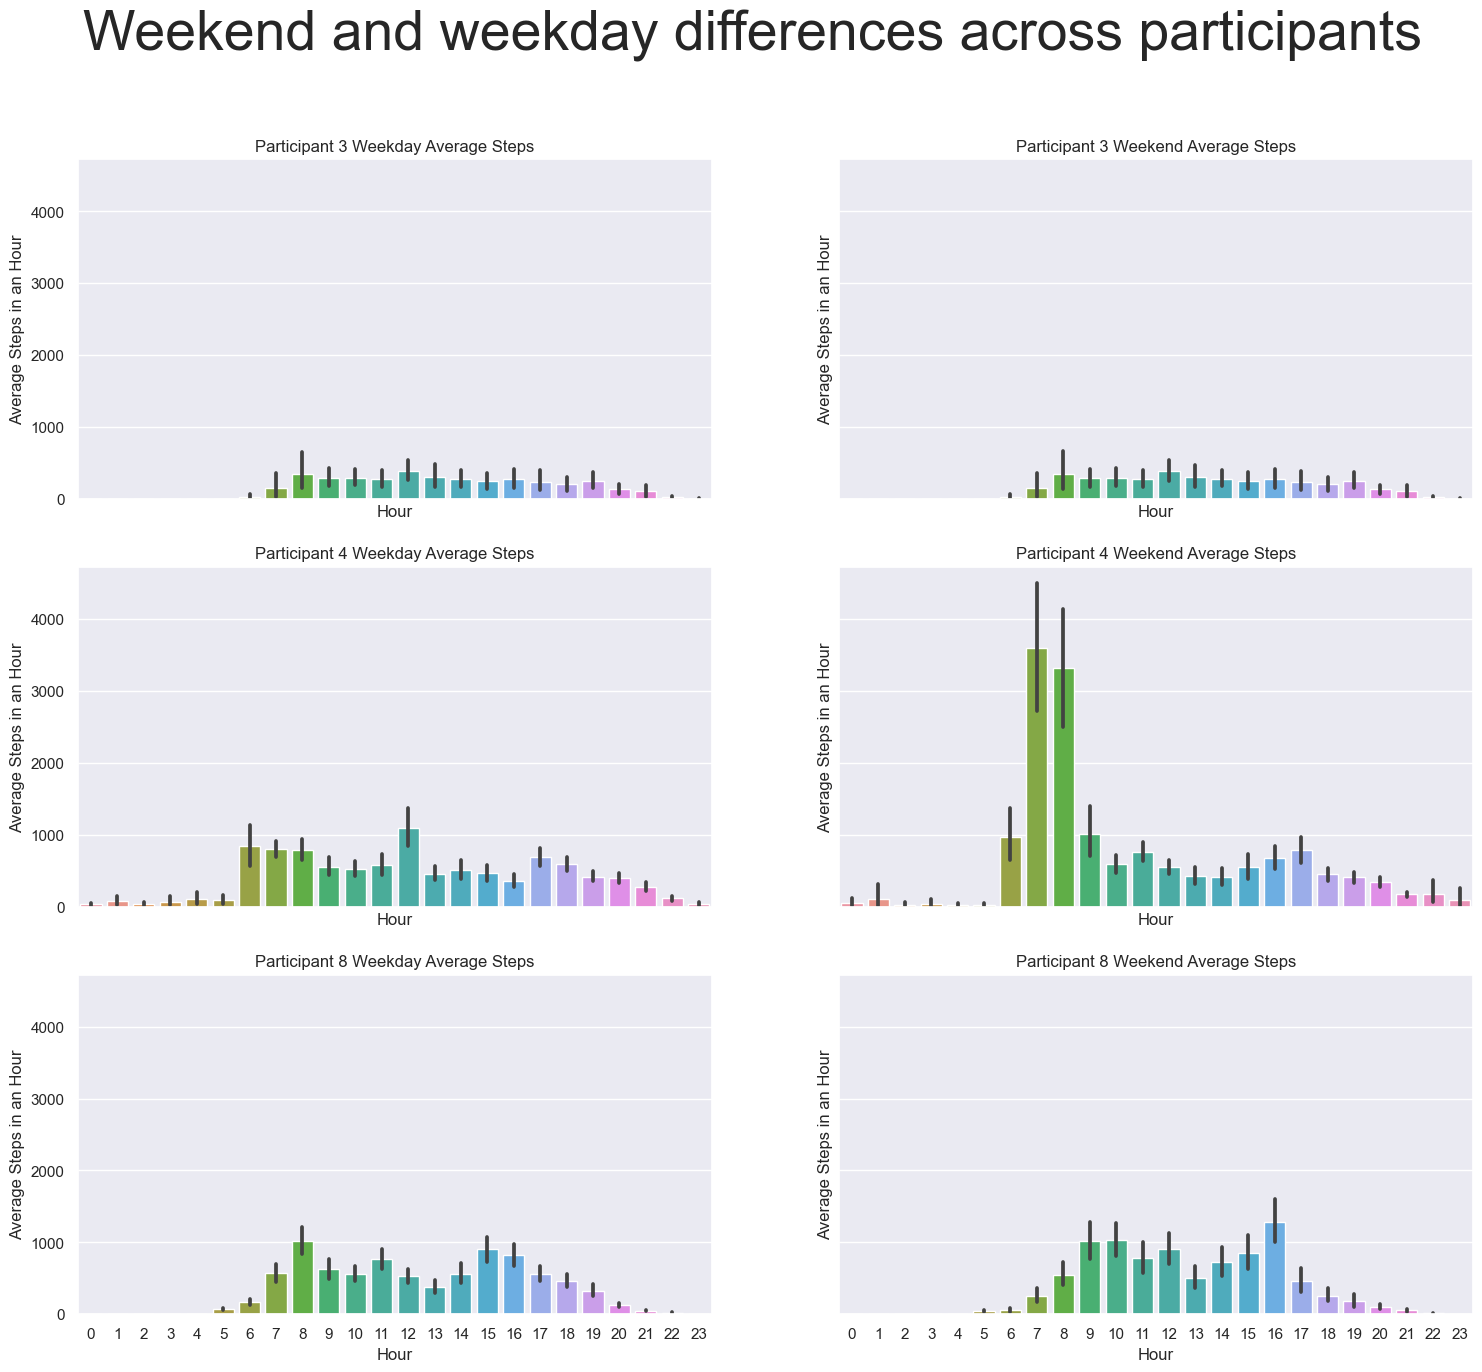

In [137]:
sns.set_theme()

#Creates 2 x 2 matrix of 'subplots', which are later filled with specific plots
fig, axes = plt.subplots(3, 2, figsize=(18, 15), sharey=True, sharex=True)
fig.suptitle('Weekend and weekday differences across participants', fontsize = 40)

#Populates the individual sub-plots with specific plots
sns.barplot(ax=axes[0,0], data=weekends3, x="Hour", y="Steps")
sns.barplot(ax=axes[0,1], data=weekends3, x="Hour", y="Steps")
sns.barplot(ax=axes[1,0], data=weekdays4, x="Hour", y="Steps")
sns.barplot(ax=axes[1,1], data=weekends4, x="Hour", y="Steps")
sns.barplot(ax=axes[2,0], data=weekdays8, x="Hour", y="Steps")
sns.barplot(ax=axes[2,1], data=weekends8, x="Hour", y="Steps")

#Sets the titles of all the individual sub-plots
axes[0,0].set_title('Participant 3 Weekday Average Steps')
axes[0,1].set_title('Participant 3 Weekend Average Steps')
axes[1,0].set_title('Participant 4 Weekday Average Steps')
axes[1,1].set_title('Participant 4 Weekend Average Steps')
axes[2,0].set_title('Participant 8 Weekday Average Steps')
axes[2,1].set_title('Participant 8 Weekend Average Steps')

#Sets the y-label of all the individual sub-plots
axes[0,0].set_ylabel("Average Steps in an Hour")
axes[0,1].set_ylabel("Average Steps in an Hour")
axes[1,0].set_ylabel("Average Steps in an Hour")
axes[1,1].set_ylabel("Average Steps in an Hour")
axes[2,0].set_ylabel("Average Steps in an Hour")
axes[2,1].set_ylabel("Average Steps in an Hour")


### Hourly Patterns
The statistically tests do not say whether weekends, or weekends had a lower mean, just that they were significantly different for the first 2 participants. From the reading of the graph, participant 3 and 4would seen to talk more on weekends, whereas participant 8 holds a slight bias for the weekend (although not statistically significant).

### Outliers
The outlier of participant 4's 7-8am is very significant, partly because their other behaviour, asides from the outlier, is in-line with the other participants, following the twin peaks of mid morning and mid afternoon, with the nightly floor and mid-day dip. 

### Confidence intervals 
For participant 3, the error bars are significant, overlapping with zero in some cases (which is statistically absurd, as negative steps are impossible).

### Limitations of this method 
This model lacks the ability to statistically prove the intuition that can be gained from this series of graphs. The counter to the lack of rigor is the accessibility, ease of understanding, and allowing of future work investigating new questions.


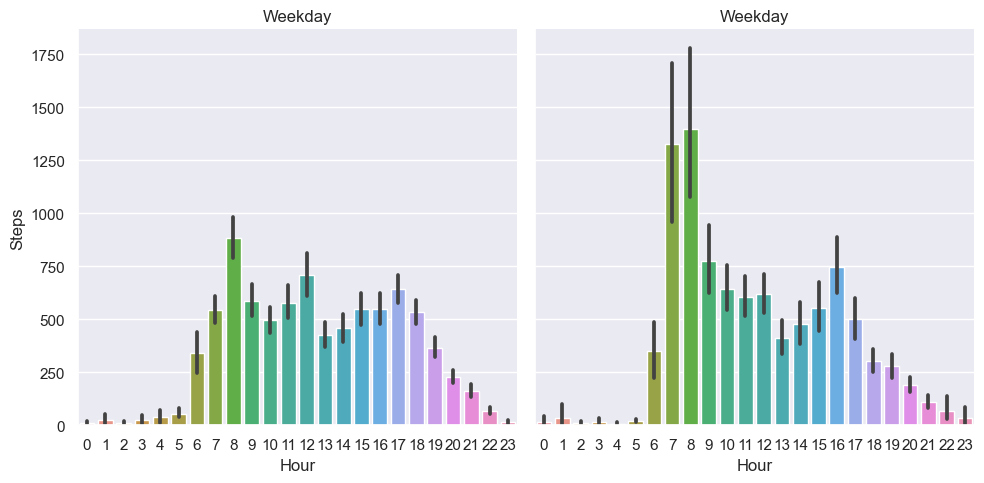

In [143]:
#Aggregate Weekend and Weekday by appending all the weekend/weekday datasets together
days = pd.concat([weekdays3, weekdays4, weekdays8, weekends3, weekends4, weekends8])
days['type'] = np.where((days['Day'] == 5) | (days['Day'] == 6), 'weekend', 'weekday')

#plots 
fig2 = sns.catplot(data=days, x="Hour", y="Steps", col = "type", kind = "bar", sharey = True)
fig2.set_titles("Weekday", "Weekend", fontsize = 40)
# fig2.fig.suptitle("cheese")

### Hourly Patterns
Clearly both weekends and weekdays have a dip towards mid-day, with a bi- or multi-modal distribution. This may be due to the peak heat of midday is avoided during weekends, and on weekdays, work or Uni take up significant time that could be used for exercise

### Outliers
The significant outlier of participant 4's 8-9am Saturday run persists, which leads to concerns about the universality of the results.

### Confidence intervals 
The graph provides 95% confidence intervals around the data points, which leads to an interesting pattern in the uncertainty of weekends and weekdays, continues from the previous graph. Weekends have larger confidence intervals, partly due to a higher mean, and partly due to the significantly fewer recordings of weekends compared to weekdays.

### Limitations of this method 
Adding the number of steps linearly strongly biases towards the data points, which are structurally higher, such as participant 4, whose 7-8am saturday run persists through the dataset. 
One method of mitigating this issue would be to remove outliers from the dataset, or include more data sources (such as datasets 1-2,5-7)

Text(0.5, 0.98, 'Weekday average steps')

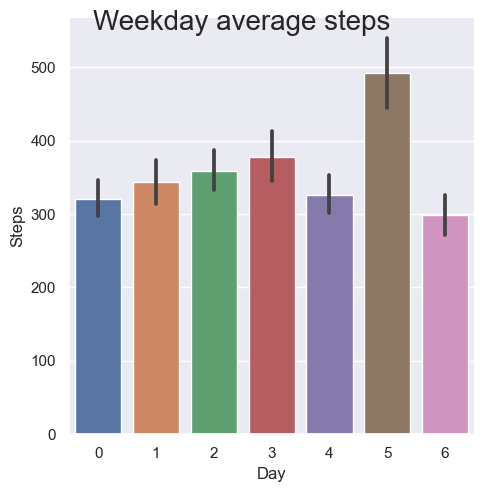

In [139]:
#This plot is sexy
fig3 = sns.catplot(data=days, x="Day", y="Steps", kind = "bar")
fig3.fig.suptitle("Weekday average steps", fontsize = 20)

## Are there patterns in the distribution of steps taken on certain days?

### Outliers
The persistance of the 8-9am saturday run outlier is continued in this graph, reducing the accuracy of findings. Using sunday as a proxy for the average weekend without the outlier on saturday, then weekdays would have significantly more activity than weekends, flipping the trend. This makes a strong argument that the original statistical testing may have had flawed assumptions, requiring a revisit after exploring a greater dataset.

### Confidence intervals 
Due to far more instances, the confidence intervals for days are much smaller than hours, leading to more statistically significant results. 

### Limitations of this method
This method does not account for the significant outlier from dataset 4

## Conclusion
The statistically significance of the difference in average steps taken between weekends and weekdays has become more questionable as the small variety of the data, as well as significant structural outliers reduce the universality of the findings. Further research would be able to combat these problems with a less biased selection group, as well as a greater number of samples.

In [140]:
#TODO change 0-6 to mon-sun
#TODO Literate programming